In [20]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from scipy.stats import pearsonr

#Load the data in a dataframe and print the first rows.
def load_dataframe(dataset):
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['MEDV'] = pd.Series(dataset.target)
    return df

dataset = load_boston()
boston_dataframe = load_dataframe(dataset)
print(boston_dataframe[:20])

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1   0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2   0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3   0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4   0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5   0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6   0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7   0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8   0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9   0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   
10  0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467  5.0  311.0   
11  0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267  5.0  311.0   
12  0.09378  12.5   7.87 

In [19]:
#Make a function count_missing_values which return the number of missing values for each attribute.
def count_missing_values(boston_dataframe):
    return boston_dataframe.isnull().sum()

print(count_missing_values(boston_dataframe))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


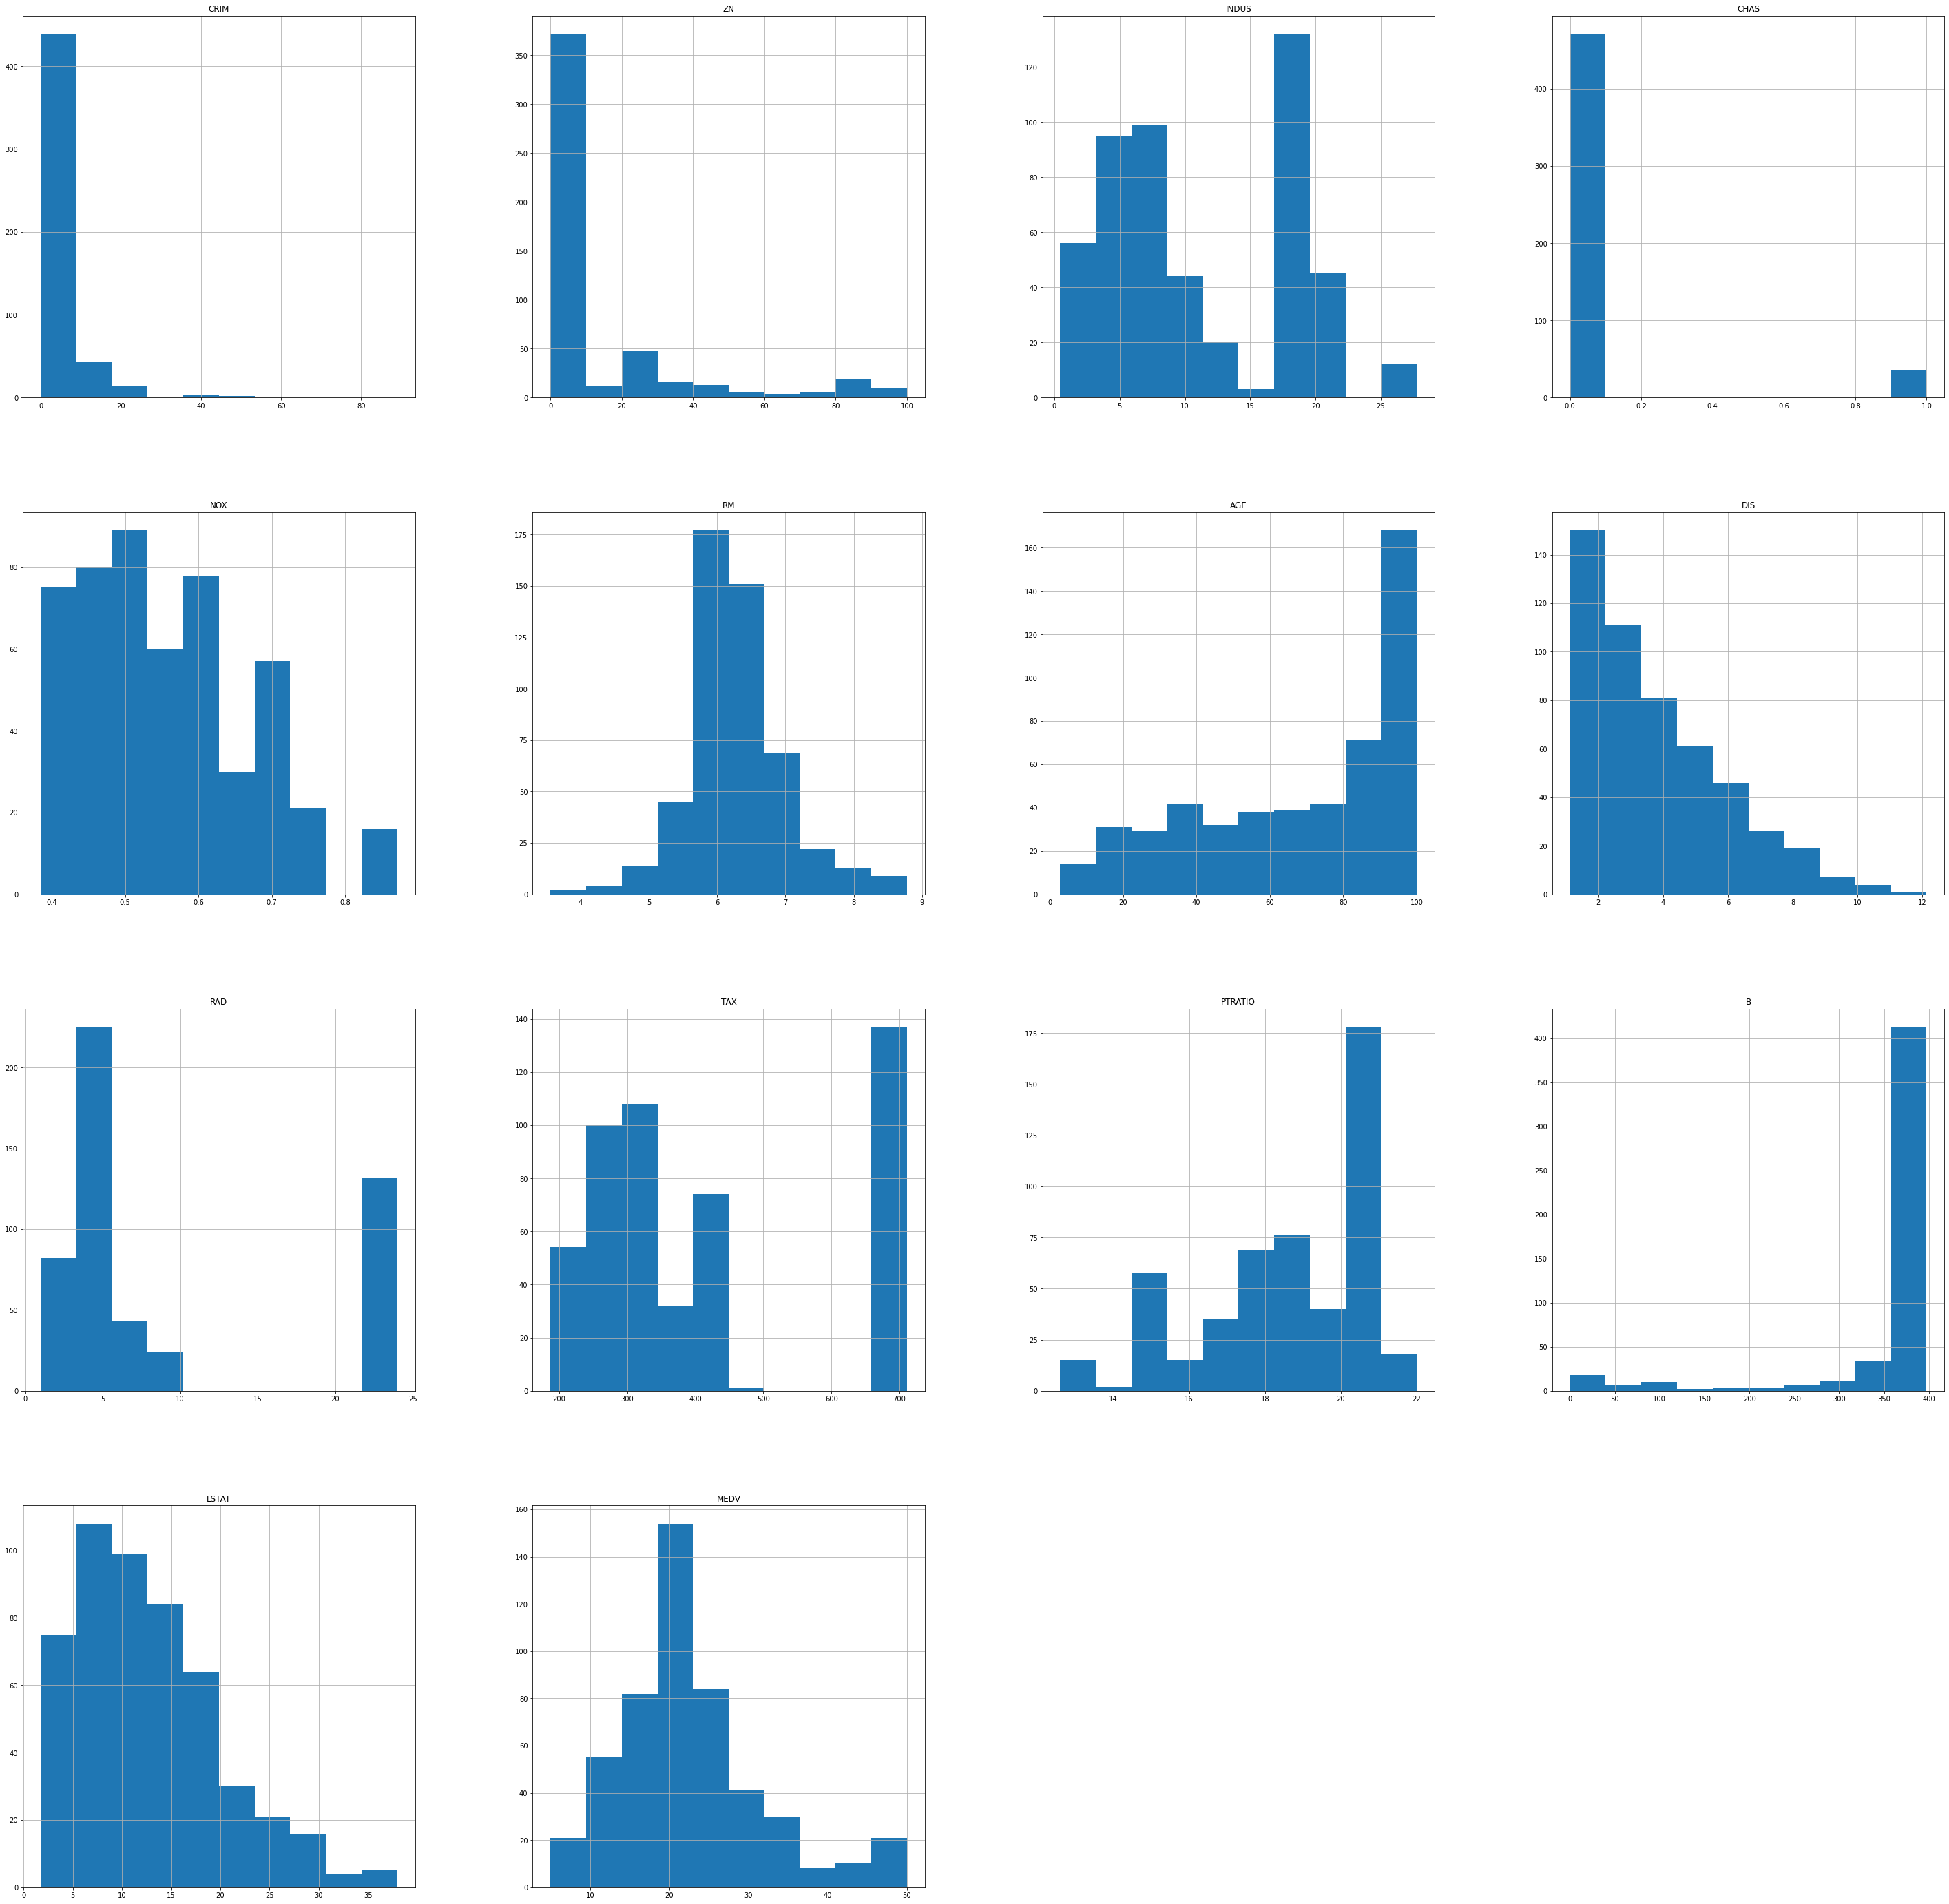

In [18]:
#Plot each attribute in a histogram.
def plot_histogram(dataframe):
    dataframe.hist(figsize=(50, 50))
    pyplot.show()
    pass

plot_histogram(boston_dataframe)

In [4]:
# Write a function compute_correlations_matrix to compute Pearson's correlations between every pair of attributes.
def compute_correlations_matrix(boston_dataframe):
    #returns dict with 'name': list of collerations with other 'names'
    res_dict = {}
    for column, content in boston_dataframe.items():
        res_dict[column] = {}
        for name, data in boston_dataframe.items():
            res_dict[column][name] = pearsonr(content, data)[0]
    return res_dict
        
    

correlations = compute_correlations_matrix(boston_dataframe)

print(correlations['MEDV']) 

{'CRIM': -0.38830460858681154, 'ZN': 0.3604453424505427, 'INDUS': -0.48372516002837324, 'CHAS': 0.1752601771902987, 'NOX': -0.42732077237328253, 'RM': 0.6953599470715394, 'AGE': -0.37695456500459623, 'DIS': 0.24992873408590388, 'RAD': -0.3816262306397778, 'TAX': -0.46853593356776696, 'PTRATIO': -0.5077866855375613, 'B': 0.33346081965706637, 'LSTAT': -0.7376627261740147, 'MEDV': 0.9999999999999997}


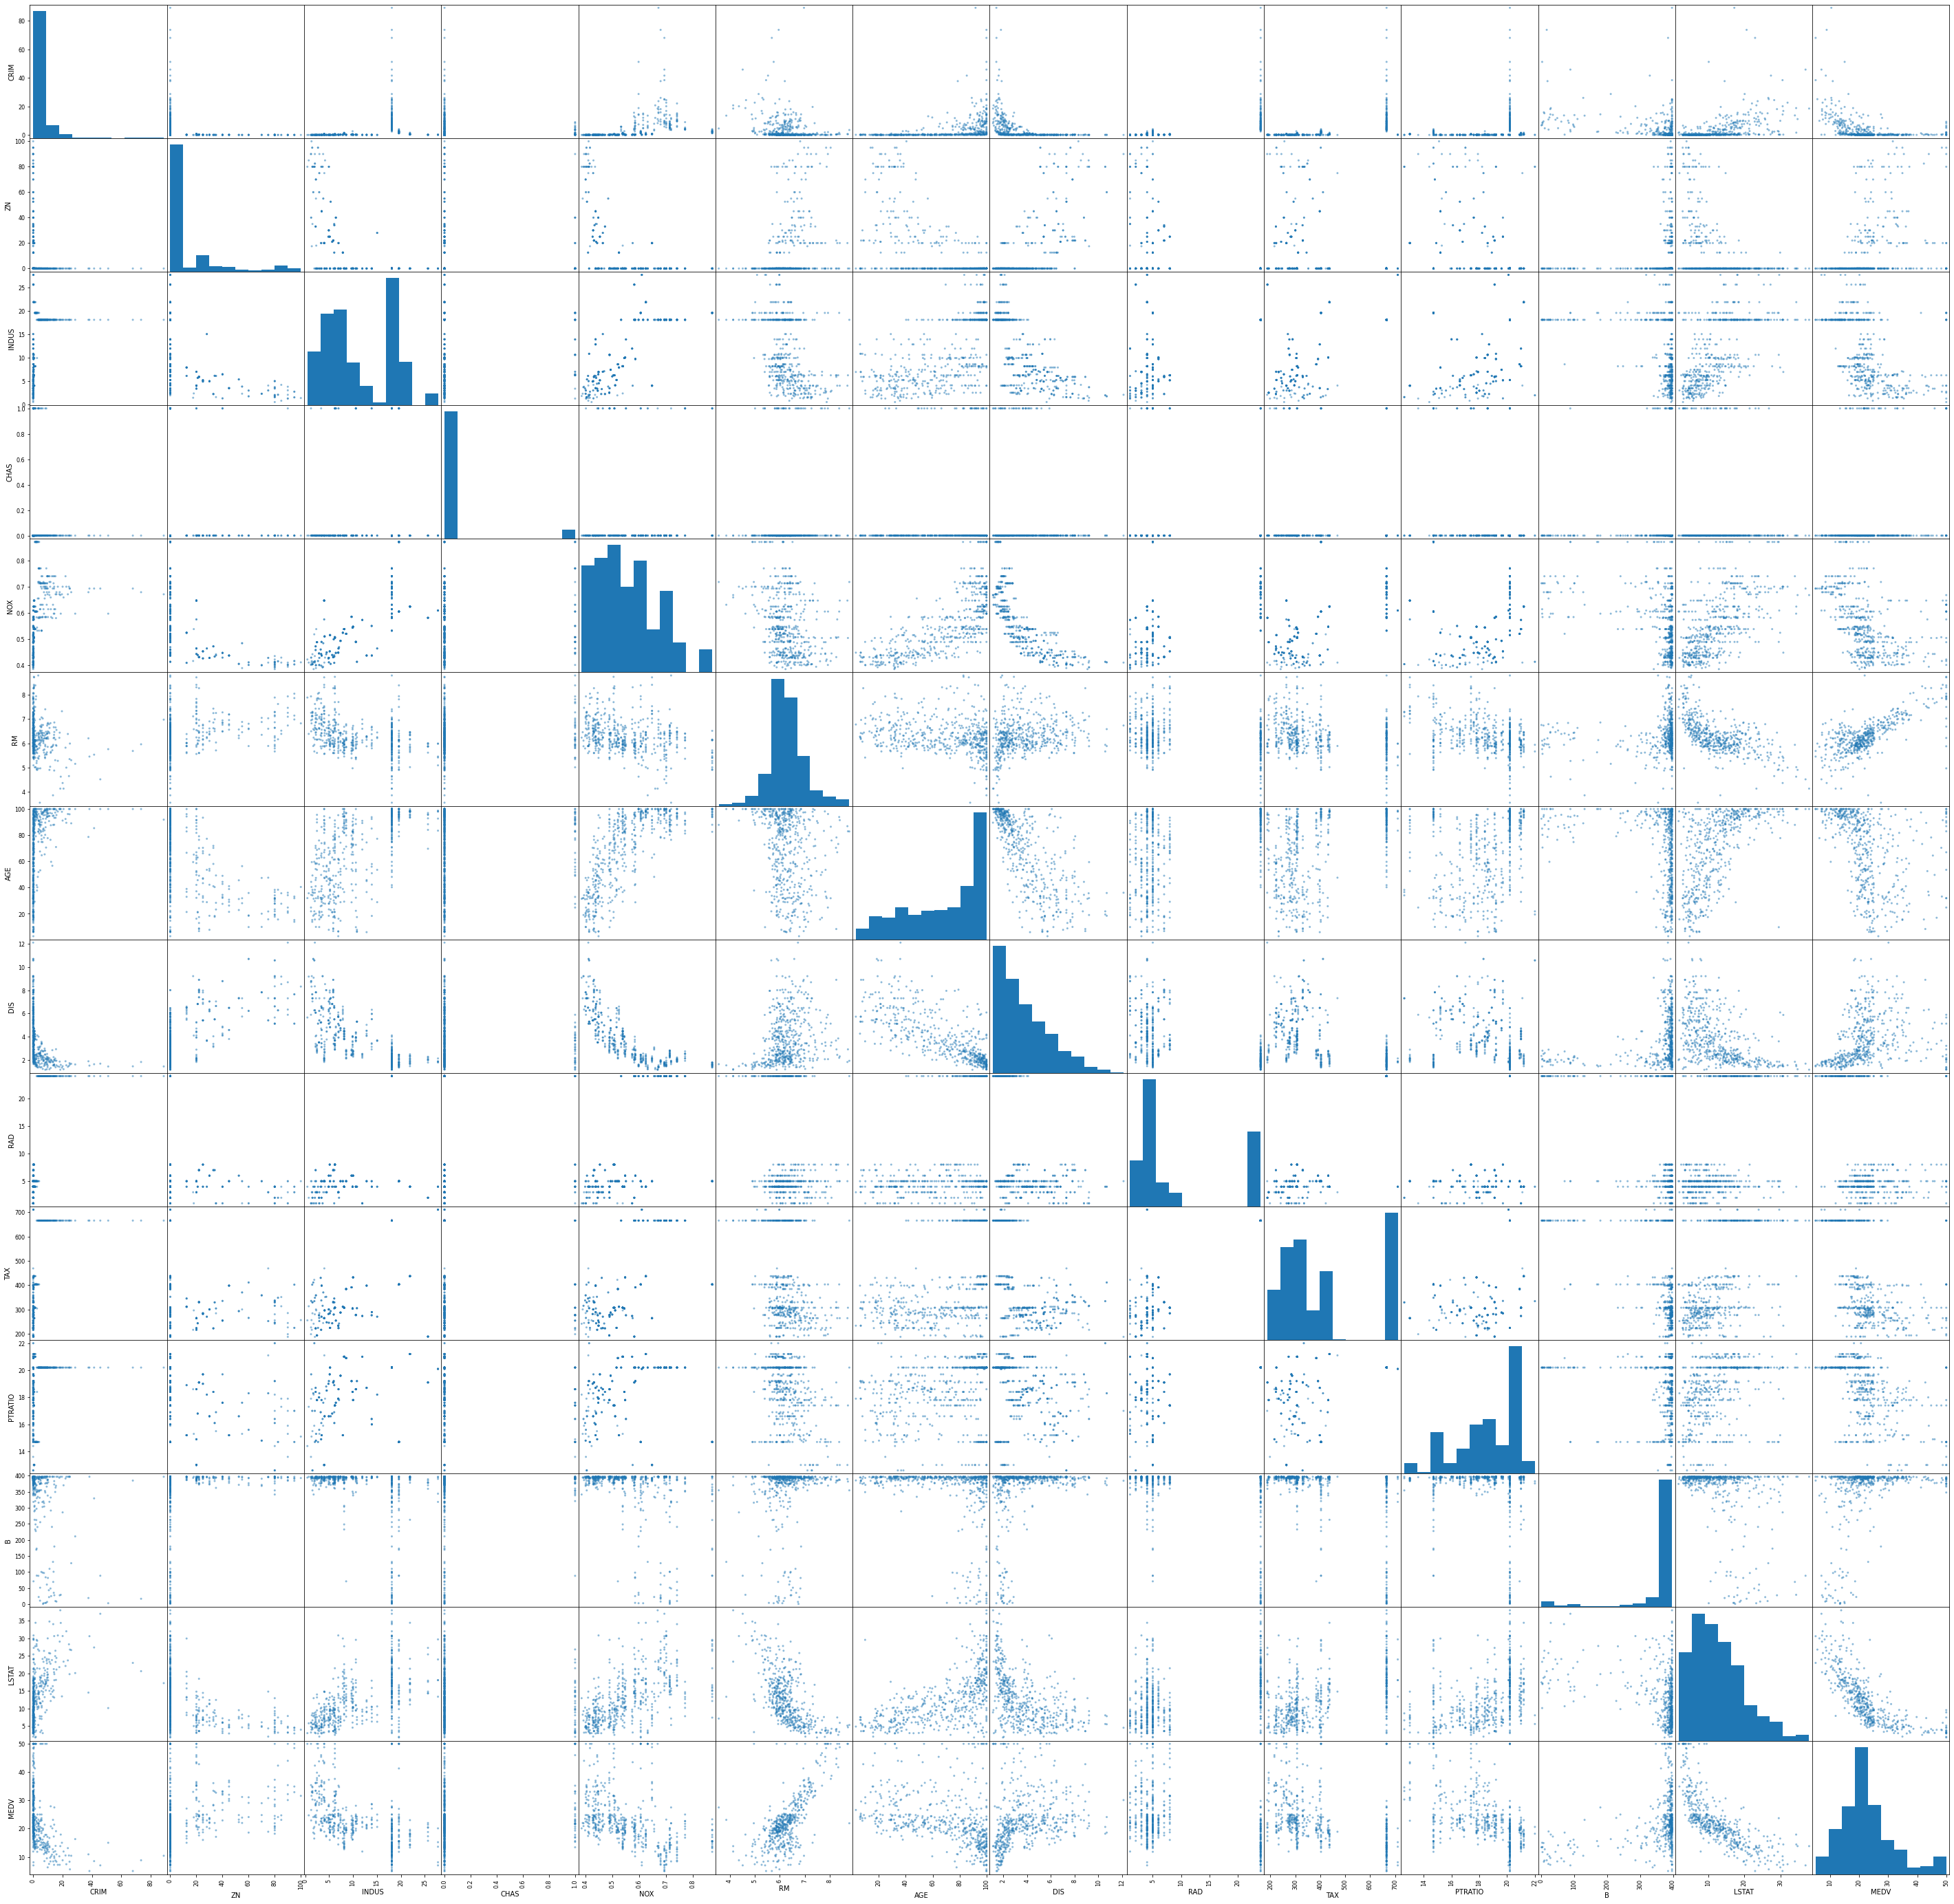

In [21]:
#Plot every attribute against each other.
def plot_scatter_matrix(dataset):
    scatter_matrix(dataset, figsize=(50, 50))
    pyplot.show()
    pass

plot_scatter_matrix(boston_dataframe)

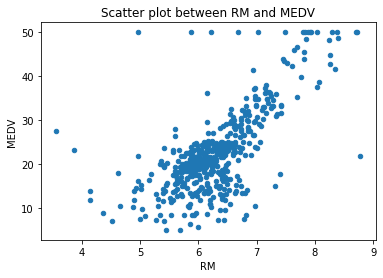

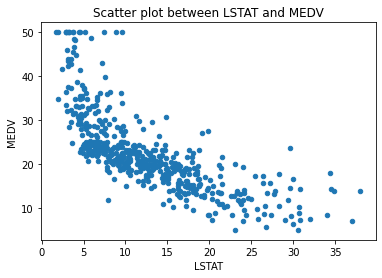

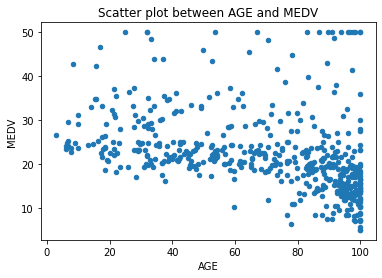

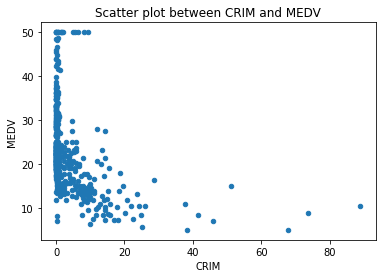

In [13]:
def draw_x_vs_y(dataframe, col_x, col_y):
    dataframe.plot.scatter(x=col_x, y=col_y, title= "Scatter plot between " + col_x + ' and ' + col_y)
    pyplot.show(block=True)
    
#Plot MEDV in function of RM    
draw_x_vs_y(boston_dataframe, "RM", "MEDV")
#Plot the correlation scatter plot of the median value against LSTAT, AGE, and CRIME
draw_x_vs_y(boston_dataframe, "LSTAT", "MEDV")
draw_x_vs_y(boston_dataframe, "AGE", "MEDV")
draw_x_vs_y(boston_dataframe, "CRIM", "MEDV")



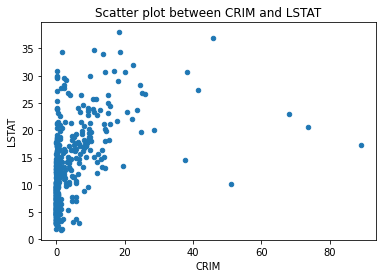

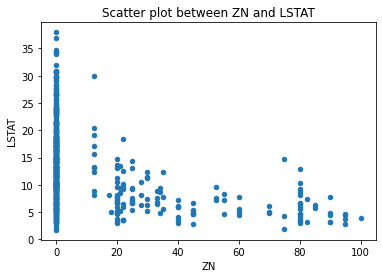

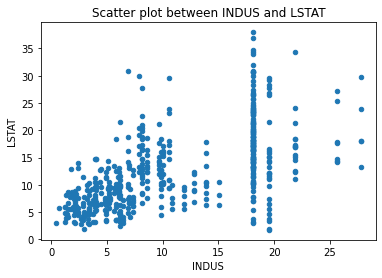

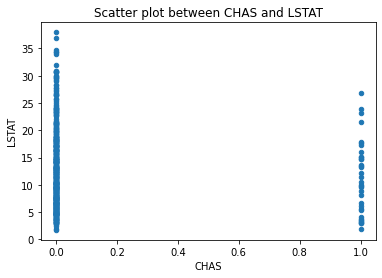

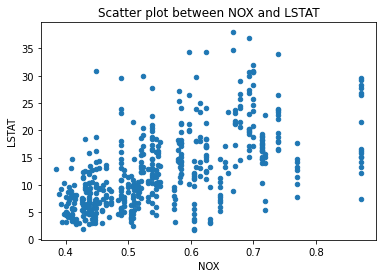

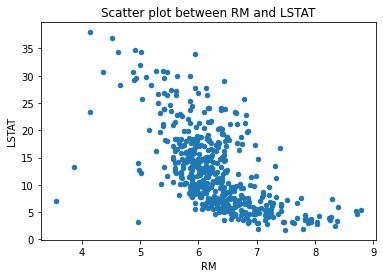

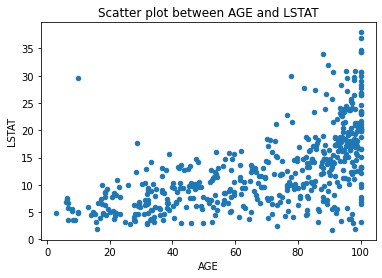

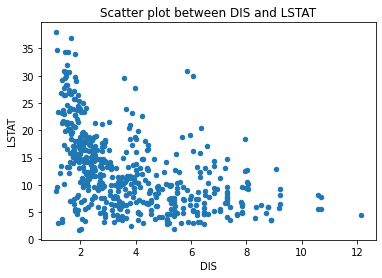

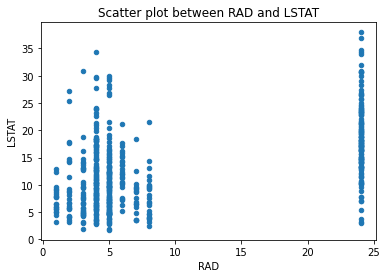

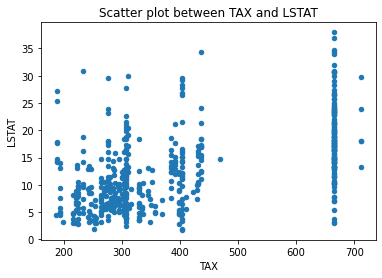

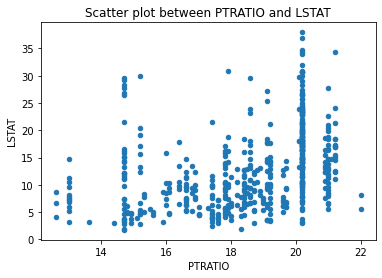

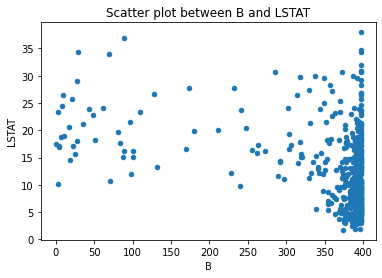

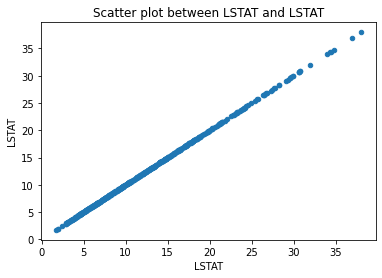

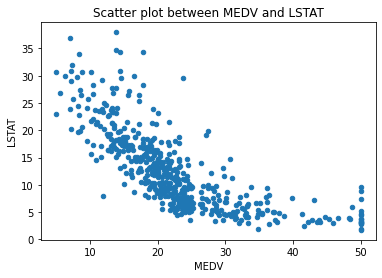

In [17]:
def plot_scatter_for_y(dataframe, col_y):
    for column, content in dataframe.items():
        dataframe.plot.scatter(x=column, y=col_y, title= "Scatter plot between " + column + ' and ' + col_y)
        pyplot.show(block=True)
#Plot the scatter matrix or print the correlation coefficients for LSTAT. 
plot_scatter_for_y(boston_dataframe, 'LSTAT')